In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from prep import draw_tree

In [2]:
df = pd.read_csv('../data/housing.csv')

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
y = df['PRICE']
X = df.drop('PRICE', axis=1)

In [5]:
guess = y.mean()

In [6]:
tree = DecisionTreeRegressor(max_depth=3)

In [7]:
gradient = y - guess

In [8]:
gradient

0       1.467194
1      -0.932806
2      12.167194
3      10.867194
4      13.667194
         ...    
501    -0.132806
502    -1.932806
503     1.367194
504    -0.532806
505   -10.632806
Name: PRICE, Length: 506, dtype: float64

In [9]:
tree

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [10]:
tree.fit(X, gradient)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

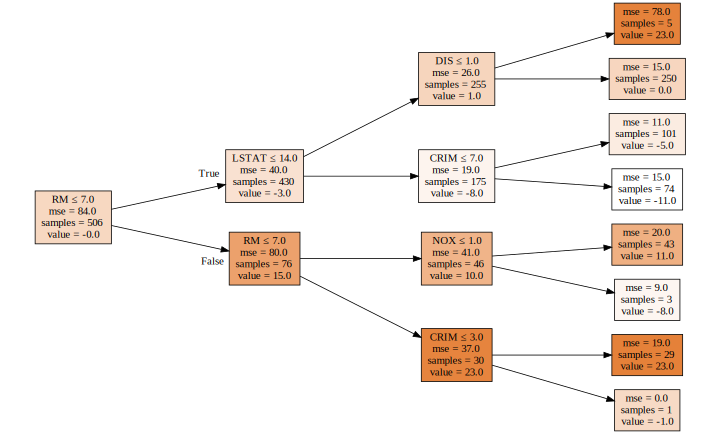

In [18]:
draw_tree(tree, X)

In [13]:
guess

22.532806324110698

In [14]:
guess += tree.predict(X)

In [19]:
gradient = y - guess

In [20]:
tree.fit(X, gradient)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

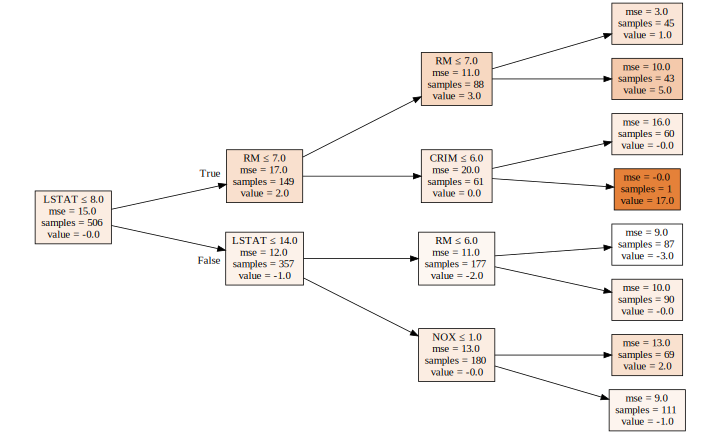

In [21]:
draw_tree(tree, X)

In [23]:
guess += tree.predict(X)

In [24]:
guess[:5]

array([28.36134711, 22.53819628, 33.10275194, 33.10275194, 33.10275194])

In [25]:
y[:5]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [26]:
learning_rate = 0.1

In [27]:
gradient = y - guess

In [28]:
tree.fit(X, gradient)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [31]:
guess += tree.predict(X)*learning_rate

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

In [33]:
gbm = GradientBoostingRegressor()

In [34]:
gbm.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [35]:
gbm.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
gbm.score(X, y)

0.9761405838418584

In [50]:
gbm.predict(X)[0]

25.907726038912276

In [54]:
gbm.estimators_[0][0].predict(X[:1])[0]

0.3723936758893236

In [55]:
estimates = [estimator[0].predict(X[:1])[0] for estimator in gbm.estimators_]

In [59]:
import numpy as np
np.sum(estimates)*0.1

3.374919714801609

In [61]:
y.mean() + 3.3749

25.9077063241107

In [71]:
df = df.sample(frac=1.0, random_state=42)

In [73]:
y = df['PRICE']
X = df.drop('PRICE', axis=1)

In [77]:
cutoff = int(X.shape[0]*0.8)

In [78]:
X_train, X_test = X[:cutoff], X[cutoff:]
y_train, y_test = y[:cutoff], y[cutoff:]

In [79]:
gbm = GradientBoostingRegressor()

In [80]:
gbm.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [81]:
gbm.score(X_train, y_train)

0.9780229513646221

In [82]:
gbm.score(X_test, y_test)

0.879383291766229

In [83]:
gbm.feature_importances_

array([3.81204880e-02, 2.65118305e-04, 2.31745011e-03, 2.11931175e-03,
       1.98992524e-02, 3.51766992e-01, 1.15491898e-02, 9.46442580e-02,
       1.79473501e-03, 1.46907264e-02, 1.83226719e-02, 7.37837702e-03,
       4.37131430e-01])

In [84]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [85]:
feats_dict = {
    'Columns': X_train.columns,
    'Importance': gbm.feature_importances_
}

In [88]:
feats = pd.DataFrame(feats_dict)

In [91]:
feats.sort_values(by='Importance', ascending=False)

,Columns,Importance
12,LSTAT,0.437131
5,RM,0.351767
7,DIS,0.094644
0,CRIM,0.038120
4,NOX,0.019899
10,PTRATIO,0.018323
9,TAX,0.014691
6,AGE,0.011549
11,B,0.007378
2,INDUS,0.002317


In [92]:
n_estimators = [50, 100, 250]
learning_rate = [.05, .1, .15]
tree_depth    = [3, 4, 5]
cv_scores = []

for estimator_num in n_estimators:
    for rate in learning_rate:
        for depth in tree_depth:
            print(f"Fitting model for:  rounds: {estimator_num}, learning_rate: {rate}, depth: {depth}")
            gbm = GradientBoostingRegressor(n_estimators=estimator_num, learning_rate=rate, max_depth=depth)
            gbm.fit(X_train, y_train)
            score = gbm.score(X_test, y_test)
            print(f"Model score: {score}")
            cv_scores.append((score, estimator_num, rate, depth))

Fitting model for:  rounds: 50, learning_rate: 0.05, depth: 3
Model score: 0.8422423864116477
Fitting model for:  rounds: 50, learning_rate: 0.05, depth: 4
Model score: 0.8548607370155226
Fitting model for:  rounds: 50, learning_rate: 0.05, depth: 5
Model score: 0.8324011031635032
Fitting model for:  rounds: 50, learning_rate: 0.1, depth: 3
Model score: 0.8762327205101178
Fitting model for:  rounds: 50, learning_rate: 0.1, depth: 4
Model score: 0.8693558899765323
Fitting model for:  rounds: 50, learning_rate: 0.1, depth: 5
Model score: 0.8547125312371433
Fitting model for:  rounds: 50, learning_rate: 0.15, depth: 3
Model score: 0.870844630701672
Fitting model for:  rounds: 50, learning_rate: 0.15, depth: 4
Model score: 0.8819704257409078
Fitting model for:  rounds: 50, learning_rate: 0.15, depth: 5
Model score: 0.8355416309099317
Fitting model for:  rounds: 100, learning_rate: 0.05, depth: 3
Model score: 0.8730660144416509
Fitting model for:  rounds: 100, learning_rate: 0.05, depth: 4


In [94]:
max(cv_scores)

(0.8819704257409078, 50, 0.15, 4)

In [95]:
import category_encoders as ce

In [96]:
te = ce.TargetEncoder()
ore = ce.OrdinalEncoder()
ohe = ce.OneHotEncoder(use_cat_names=True)

In [100]:
df = pd.read_csv(r"C:\Users\Jonat\dat-02-22\ClassMaterial\Unit2\data\master.csv", parse_dates=['visit_date'])

In [109]:
X = df.drop('visitors', axis=1)
y = df['visitors']

In [111]:
df.groupby('day_of_week')['visitors'].mean()

day_of_week
Friday       23.072737
Monday       17.177009
Saturday     26.313688
Sunday       23.873362
Thursday     18.922702
Tuesday      17.672137
Wednesday    19.230121
Name: visitors, dtype: float64

In [110]:
te.fit_transform(X, y)

,id,visit_date,calendar_date,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors
0,22.782609,2016-01-13,18.433460,19.230121,0,18.723532,19.609418,35.658068,139.751599,NaN
1,22.782609,2016-01-14,19.229927,18.922702,0,18.723532,19.609418,35.658068,139.751599,NaN
2,22.782609,2016-01-15,23.506897,23.072737,0,18.723532,19.609418,35.658068,139.751599,NaN
3,22.782609,2016-01-16,26.780142,26.313688,0,18.723532,19.609418,35.658068,139.751599,NaN
4,22.782609,2016-01-18,14.486726,17.177009,0,18.723532,19.609418,35.658068,139.751599,NaN
...,...,...,...,...,...,...,...,...,...,...
252103,44.595745,2017-04-21,25.030612,23.072737,0,22.582953,20.466463,34.695124,135.197852,6.0
252104,44.595745,2017-04-22,27.448320,26.313688,0,22.582953,20.466463,34.695124,135.197852,37.0
252105,44.595745,2017-03-26,24.098333,23.873362,0,22.582953,20.466463,34.695124,135.197852,35.0
252106,44.595745,2017-03-20,24.043400,17.177009,1,22.582953,20.466463,34.695124,135.197852,3.0


In [106]:
ore.category_mapping

[{'col': 'id',
  'mapping': air_ba937bf13d40fb24      1
  air_25e9888d30b386df      2
  air_fd6aac1043520e83      3
  air_64d4491ad8cdb1c6      4
  air_ee3a01f0c71a769f      5
                         ... 
  air_cf5ab75a0afb8af9    826
  air_1c0b150f9e696a5f    827
  air_900d755ebd2f7bbd    828
  air_a17f0778617c76e2    829
  NaN                      -2
  Length: 830, dtype: int64,
  'data_type': dtype('O')},
 {'col': 'calendar_date',
  'mapping': 2016-01-13      1
  2016-01-14      2
  2016-01-15      3
  2016-01-16      4
  2016-01-18      5
               ... 
  2016-01-01    475
  2016-01-03    476
  2017-01-02    477
  2016-01-02    478
  NaN            -2
  Length: 479, dtype: int64,
  'data_type': dtype('O')},
 {'col': 'day_of_week',
  'mapping': Wednesday    1
  Thursday     2
  Friday       3
  Saturday     4
  Monday       5
  Tuesday      6
  Sunday       7
  NaN         -2
  dtype: int64,
  'data_type': dtype('O')},
 {'col': 'genre',
  'mapping': Dining bar                 